# Install dependencies

In [0]:
pip install pm4py

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Load log from csv

XES possible

In [0]:
from pm4py.objects.log.importer.csv import factory as csv_importer
from pm4py.objects.log.importer.xes import factory as xes_importer
from pm4py.visualization.petrinet import factory as vis_factory
from pm4py.util import constants
from pm4py.objects.log.adapters.pandas import csv_import_adapter
from pm4py.objects.conversion.log import factory as conversion_factory

CASEID_GLUE = 'Case ID'
ACTIVITY_KEY = 'Activity'
TIMEST_KEY = 'timestamp'
parameters = {constants.PARAMETER_CONSTANT_CASEID_KEY: CASEID_GLUE,
              constants.PARAMETER_CONSTANT_ACTIVITY_KEY: ACTIVITY_KEY}

df = csv_import_adapter.import_dataframe_from_path("/content/drive/My Drive/Student/VFU/s2/Process mining/logs/running-example.csv", sep=';')
log = conversion_factory.apply(df, parameters)
log

[{'attributes': {'concept:name': 1}, 'events': [{'Case ID': 1, 'Event ID': 35654423, 'timestamp': Timestamp('2010-12-30 11:02:00+0000', tz='UTC'), 'Activity': 'register request', 'Resource': 'Pete', 'Costs': 50}, '..', {'Case ID': 1, 'Event ID': 35654427, 'timestamp': Timestamp('2011-07-01 14:24:00+0000', tz='UTC'), 'Activity': 'reject request', 'Resource': 'Pete', 'Costs': 200}]}, '....', {'attributes': {'concept:name': 6}, 'events': [{'Case ID': 6, 'Event ID': 35654871, 'timestamp': Timestamp('2011-06-01 15:02:00+0000', tz='UTC'), 'Activity': 'register request', 'Resource': 'Mike', 'Costs': 50}, '..', {'Case ID': 6, 'Event ID': 35654877, 'timestamp': Timestamp('2011-01-16 11:47:00+0000', tz='UTC'), 'Activity': 'pay compensation', 'Resource': 'Mike', 'Costs': 200}]}]

# Mining the log

## Alpha miner - Petri net

The Alpha Algorithm is one of the most known Process Discovery algorithm and is able to find:

- A Petri net model where all the transitions are visible and unique and correspond to classified events (for example, to activities).
- An initial marking that describes the status of the Petri net model when a execution starts
- A final marking that describes the status of the Petri net model when a execution ends

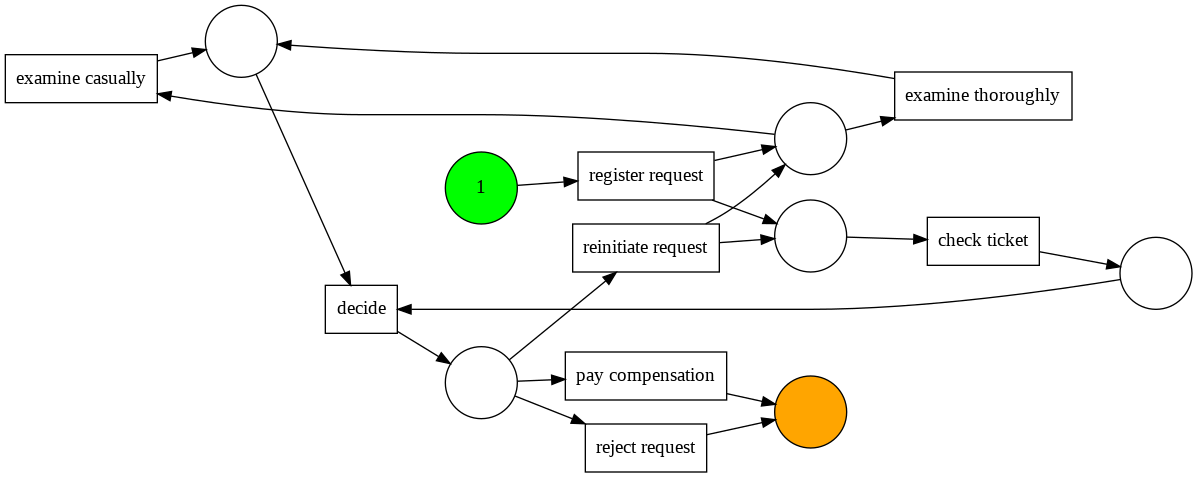

In [0]:
from pm4py.algo.discovery.alpha import factory as alpha_miner

net, initial_marking, final_marking = alpha_miner.apply(log, parameters)
gviz = vis_factory.apply(net, initial_marking, final_marking)
vis_factory.view(gviz)

## Inductive miner - process tree

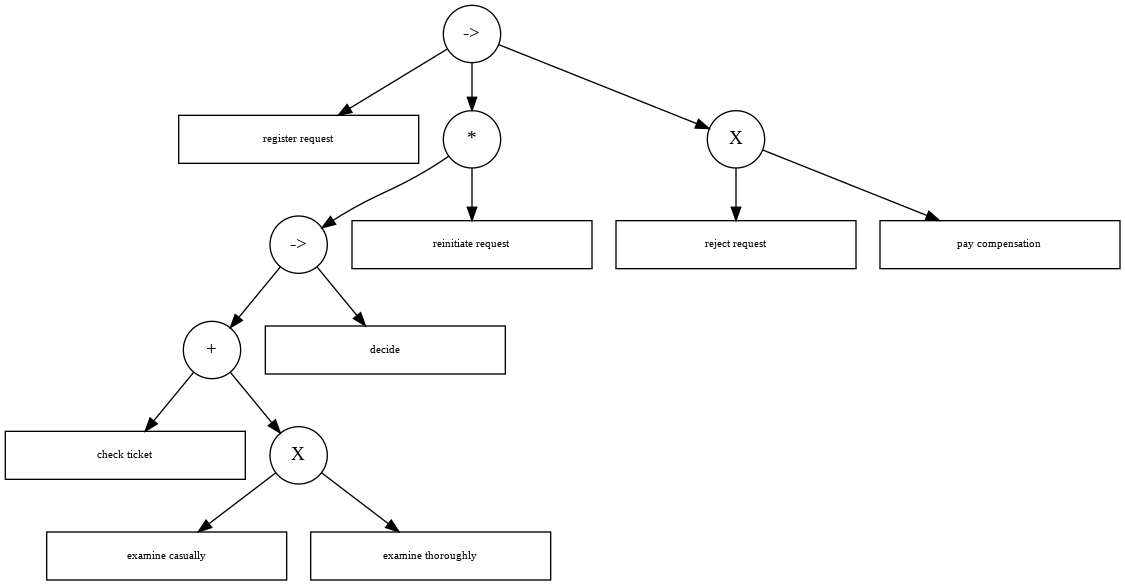

In [0]:
from pm4py.algo.discovery.inductive import factory as inductive_miner
from pm4py.visualization.process_tree import factory as pt_vis_factory

tree = inductive_miner.apply_tree(log, parameters)
gviz = pt_vis_factory.apply(tree)
pt_vis_factory.view(gviz)

sign | meaning
--- | ---
-> | sequential composition
X | exclusive choice (OR)
+ | parallel composition
* | redo loop

In [0]:
print(tree)

->( register request, *( ->( +( check ticket, X( examine casually, examine thoroughly ) ), decide ), reinitiate request ), X( reject request, pay compensation ) )


## Heuristics Miner - heuristics net

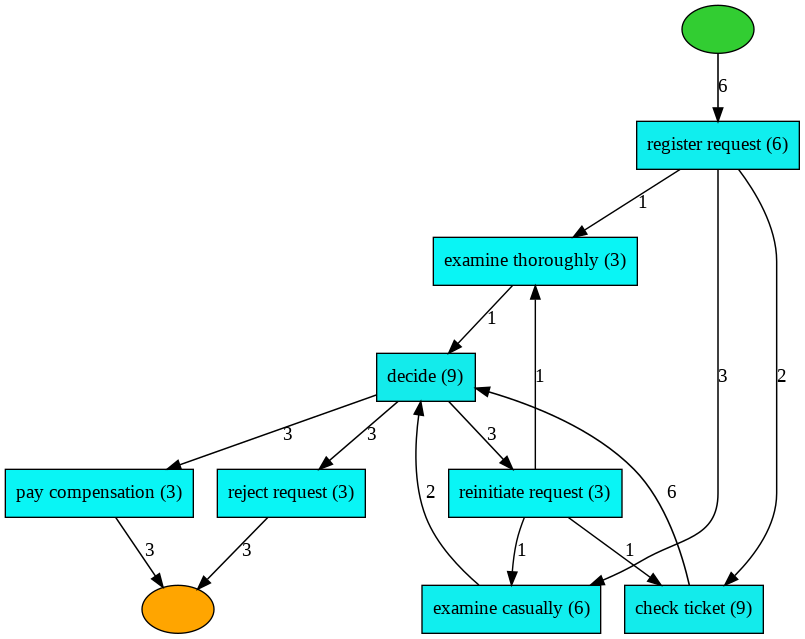

In [0]:
from pm4py.algo.discovery.heuristics import factory as heuristics_miner
from pm4py.visualization.heuristics_net import factory as hn_vis_factory

heu_net = heuristics_miner.apply_heu(log, parameters)
gviz = hn_vis_factory.apply(heu_net)
hn_vis_factory.view(gviz)

## Heuristics miner - petri net



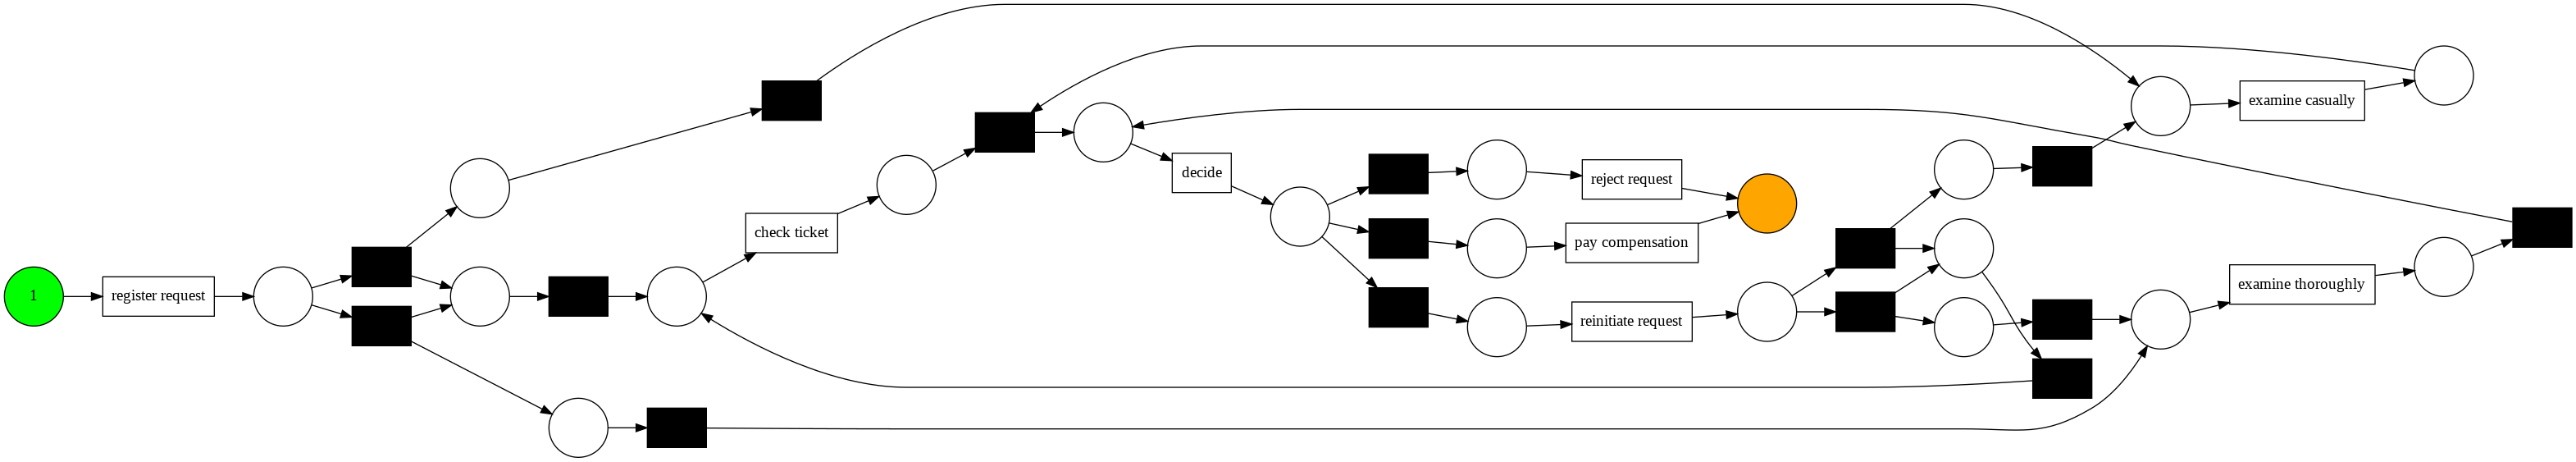

In [0]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

net, im, fm = heuristics_miner.apply(log, parametersq)
gviz = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gviz)

### with frequency/performance

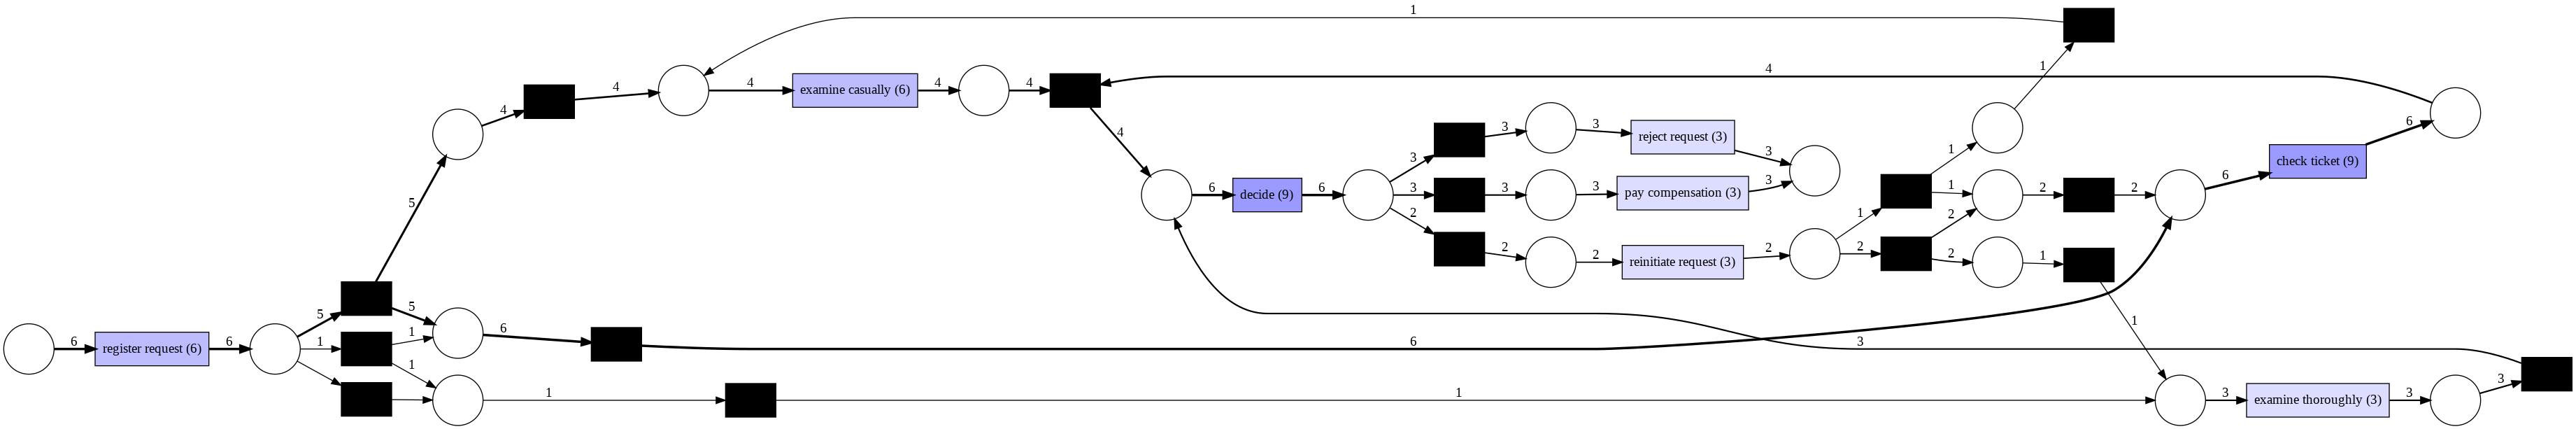

In [0]:
from pm4py.visualization.petrinet import factory as pn_vis_factory

net, im, fm = heuristics_miner.apply(log, parameters)
gviz = pn_vis_factory.apply(net, initial_marking, final_marking, parameters=parameters, variant="frequency", log=log)
pn_vis_factory.view(gviz)

pn_vis_factory.save(gviz, "inductive_frequency.png")


## Trace clustering

Clustering is an important functionality that splits the traces of the log into groups having similar behavior.

The algorithm that has been implemented in PM4Py is basilar:

- An one-hot encoding of the activities of the single events is obtained.
- A PCA is performed to reduce the number of components that are considered by the clustering algorithm.
- The DBSCAN clustering algorithm is applied in order to split the traces into groups

In [0]:
from pm4py.algo.other.conceptdrift.utils import get_representation

clf, feature_names, classes = get_representation.get_decision_tree(clusters[0], clusters[1])

ModuleNotFoundError: ignored

## Social network analysis

Only when a resource feature is present.

In [0]:
from pm4py.algo.enhancement.sna import factory as sna_factory
from pm4py.visualization.sna import factory as sna_vis_factory
from pyvis import network as net
import networkx as nx

hw_values = sna_factory.apply(log, variant="handover")
gviz_hw_py = sna_vis_factory.apply(hw_values, variant="pyvis")
sna_vis_factory.view(gviz_hw_py, variant="pyvis")

Exception: ignored